<a href="https://colab.research.google.com/github/silviaaax/datastories_for_emme/blob/main/HOMEWORK10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!python -m spacy download el_core_news_sm

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
news247_full_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/news247_df_full.csv")

In [ ]:
short_news247_df = news247_full_df[['datetime','full_text' ]]
short_news247_df.head()

In [ ]:
emolex_df['word'].head(5)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
Name: word, dtype: object

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_news247_df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
emolex_df[emolex_df.Fear == 1].head(10)

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
6,υδρα,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,απατσι,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27,δευτερα παρουσια,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
36,εξαρτηση,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
69,λυρικη σκηνη,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
84,μονομαχος,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
117,προκαθορισμενο,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
120,προσοχη,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
125,ραγισμενο,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
131,στρατος,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

In [ ]:
trust_words

In [ ]:
wordcount_df[trust_words].tail(1)

In [ ]:
short_news247_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_news247_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_news247_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_news247_df['fear'] = wordcount_df[fear_words].sum(axis=1)

short_news247_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_news247_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_news247_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_news247_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_news247_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_news247_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

In [ ]:
short_news247_df

In [ ]:
short_news247_df.reset_index(inplace=True)
short_news247_df['datetime'] = pd.to_datetime(short_news247_df['datetime'])
short_news247_df.set_index('datetime', inplace=True)
short_news247_df

**ΠΛΗΘΟΣ ΑΡΘΡΩΝ ΑΝΑ ΜΕΡΑ**

<Axes: xlabel='datetime'>

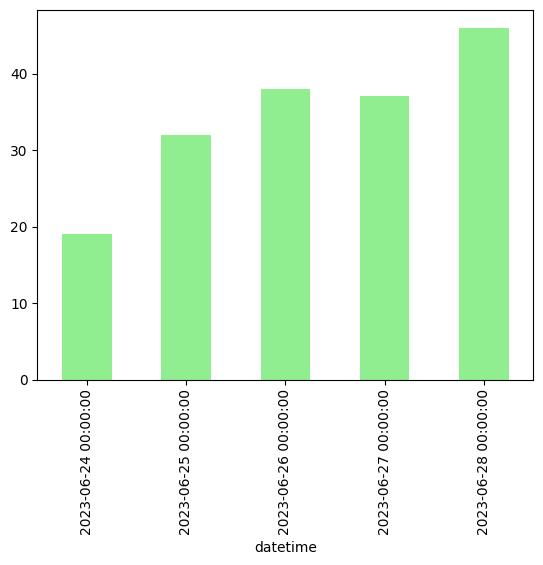

In [ ]:
short_news247_df['full_text'].resample('D').count().plot(kind='bar' , color='lightgreen')

**ΔΕΙΚΤΗΣ ΘΕΤΙΚΟΤΗΤΑΣ ΑΡΘΡΩΝ**

<Axes: xlabel='datetime'>

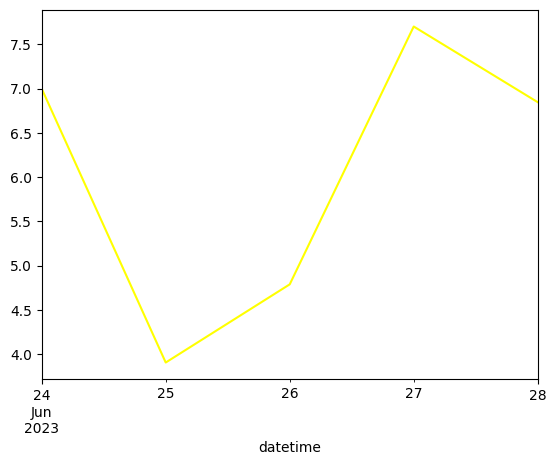

In [ ]:
short_news247_df['positive'].resample('D').mean().plot(color='yellow')

**ΔΕΙΚΤΗΣ ΑΡΝΗΤΙΚΟΤΗΤΑΣ ΑΡΘΡΩΝ**

<Axes: xlabel='datetime'>

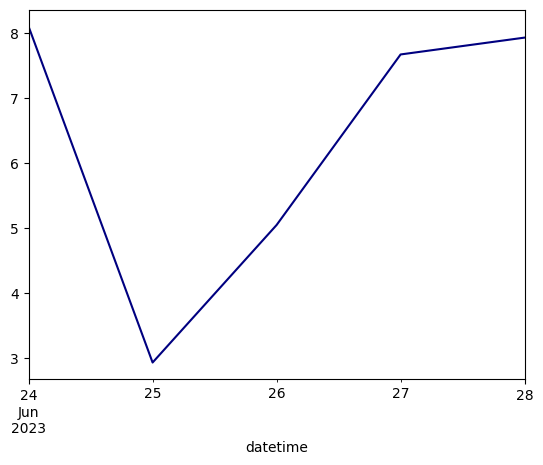

In [ ]:
short_news247_df['negative'].resample('D').mean().plot(color='navy')

**ΔΕΙΚΤΗΣ ΕΠΙΘΕΤΙΚΟΤΗΤΑΣ**


<Axes: xlabel='datetime'>

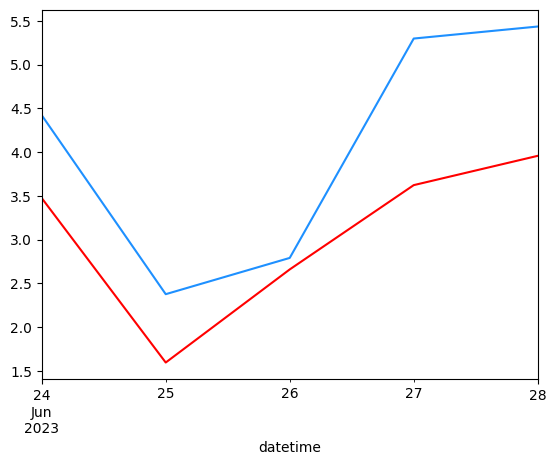

In [ ]:
short_news247_df['anger'].resample('D').mean().plot(color='red')
short_news247_df['anticipation'].resample('D').mean().plot(color='dodgerblue')

**ΔΕΙΚΤΗΣ ΑΠΕΛΠΙΣΙΑΣ**


<Axes: xlabel='datetime'>

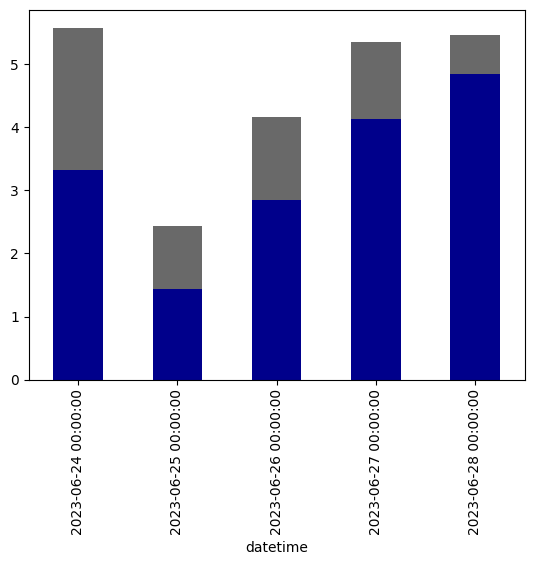

In [ ]:
short_news247_df['fear'].resample('D').mean().plot(kind='bar' , color='dimgrey')
short_news247_df['sadness'].resample('D').mean().plot(kind='bar' , color='darkblue')

**ΔΕΙΚΤΗΣ ΧΑΡΑΣ**


<Axes: xlabel='datetime'>

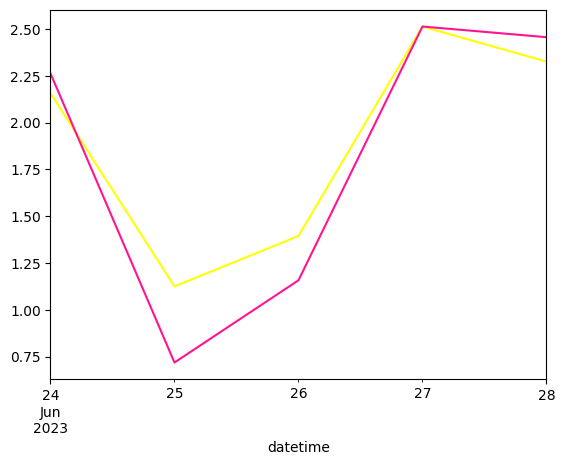

In [ ]:
short_news247_df['joy'].resample('D').mean().plot(color='yellow')
short_news247_df['surprise'].resample('D').mean().plot(color='deeppink')

**ΔΕΙΚΤΗΣ ΑΓΧΟΥΣ**


<Axes: xlabel='datetime'>

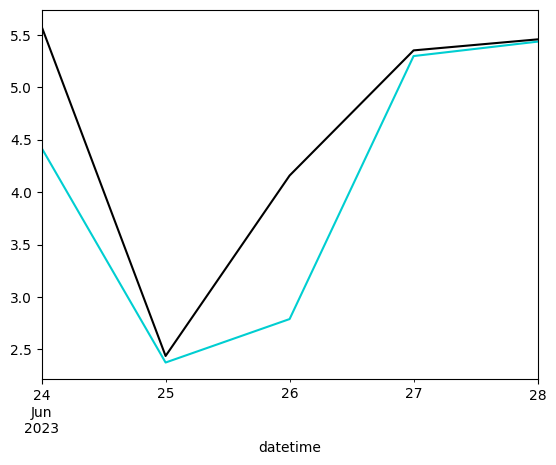

In [ ]:
short_news247_df['anticipation'].resample('D').mean().plot(color='darkturquoise')
short_news247_df['fear'].resample('D').mean().plot(color='black')

**ΔΕΙΚΤΗΣ ΑΡΝΗΤΙΚΩΝ ΣΥΝΑΙΣΘΗΜΑΤΩΝ**

<Axes: xlabel='datetime'>

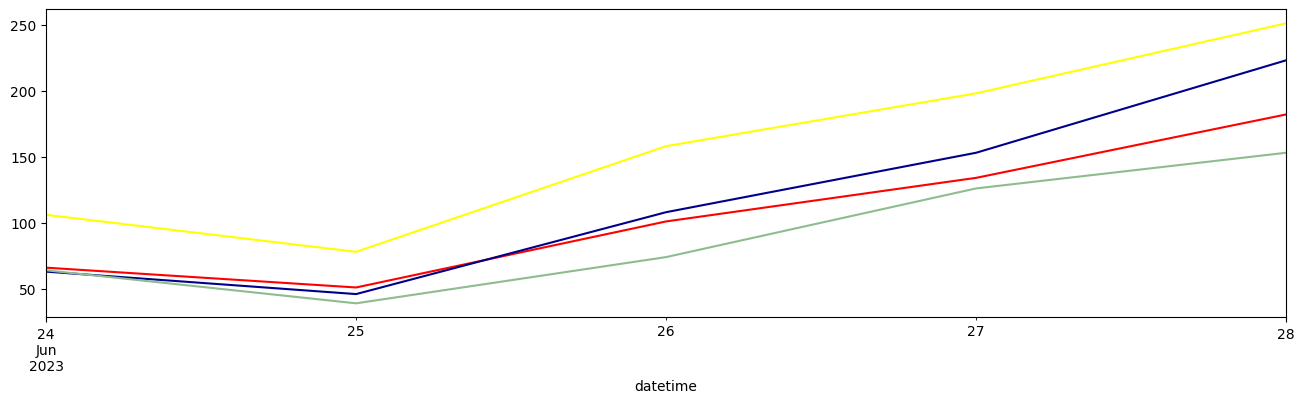

In [ ]:
ax = short_news247_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_news247_df['fear'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'yellow')
short_news247_df['sadness'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'darkblue')
short_news247_df['disgust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'darkseagreen')

**ΔΕΙΚΤΗΣ ΘΕΤΙΚΩΝ ΣΥΝΑΙΣΘΗΜΑΤΩΝ**

<Axes: xlabel='datetime'>

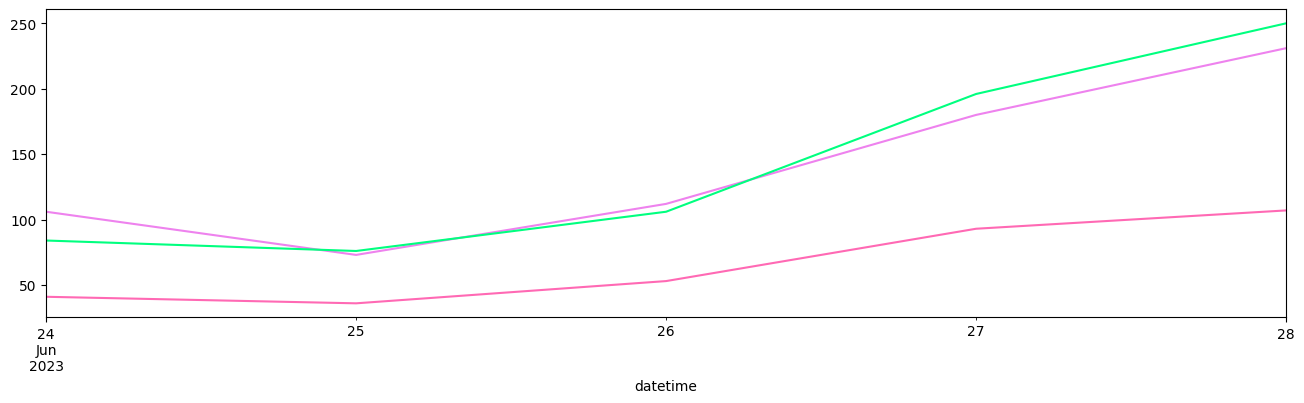

In [ ]:
ax = short_news247_df['joy'].resample('D').sum().plot(figsize=(16,4), color = 'hotpink')
short_news247_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'violet')
short_news247_df['anticipation'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'springgreen')

**ΑΝΤΙΘΕΣΕΙΣ**


In [ ]:
plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='datetime'>

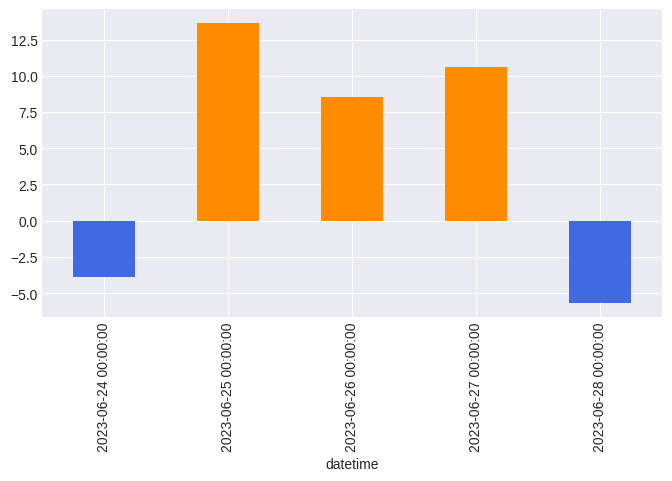

In [ ]:
short_news247_df['(-)αρνητικότητα | θετικότητα(+)'] = short_news247_df.positive*100//short_news247_df[['positive','negative']].sum(
        axis=1) - short_news247_df.negative*100//short_news247_df[['positive','negative']].sum(axis=1)

short_news247_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_news247_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'darkorange', False: 'royalblue'}), figsize=(8,4))

**ΑΝΤΙΘΕΣΗ ΧΑΡΑ ΚΑΙ ΛΥΠΗΣ**

<Axes: xlabel='datetime'>

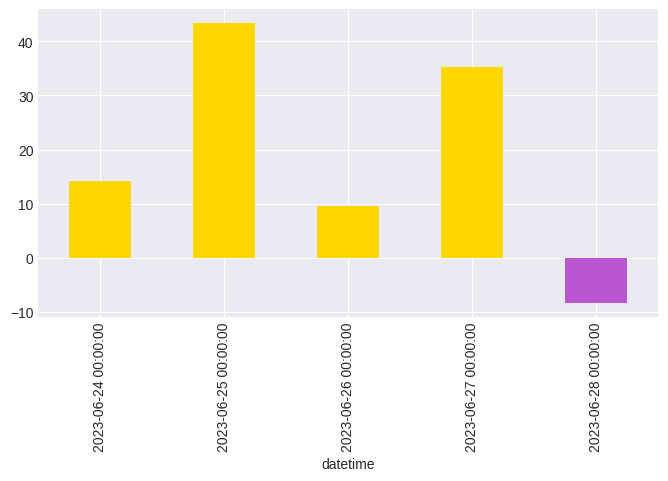

In [ ]:
short_news247_df['(-)λύπη | χαρά(+)'] = short_news247_df.positive*100//short_news247_df[['joy','sadness']].sum(
        axis=1) - short_news247_df.negative*100//short_news247_df[['joy','sadness']].sum(axis=1)

short_news247_df['(-)λύπη | χαρά(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_news247_df['(-)λύπη | χαρά(+)'].resample('D').mean()>0
                                                                               ).map({True: 'gold', False: 'mediumorchid'}), figsize=(8,4))

# **ΥΠΟΘΕΣΗ ΔΟΛΟΦΟΝΙΑΣ ΤΗΣ ΑΝΑΣΤΑΖΙΑ**


In [ ]:
vocabulary = ['γυναικοκτονία' , 'ανθρωποκτονία' , 'Αναστάζια', 'Κω', 'Κως', 'έγκλημα' , 'εξαφάνιση' , 'έρευνα' , 'έρευνες' , 'μητέρα' , 'ίχνη' , 'εθελόντρια', 'αλυκές', 'περιοχή', 'θύμα', 'δολοφονία', 'δολοφόνος', 'βιασμό', 'πτώμα', 'θάνατο' , 'θάνατος' ,'σορός', 'σακούλες', '27χρονης', '32χρονος']

In [ ]:
anastazia_case_df = short_news247_df[short_news247_df['full_text'].str.contains('|'.join(vocabulary))]

**ΔΕΙΚΤΗΣ ΤΥΨΗΣ ΣΥΝΕΙΔΗΣΗΣ(REMORSE) ΓΙΑ ΤΗΝ ΥΠΟΘΕΣΗ ΑΝΑΣΤΑΖΙΑ**

<Axes: xlabel='datetime'>

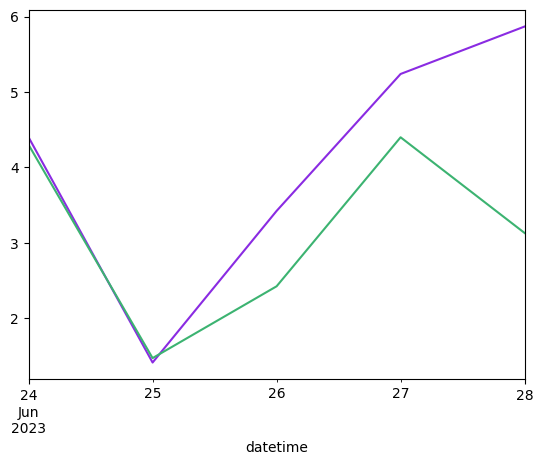

In [ ]:
anastazia_case_df['sadness'].resample('D').mean().plot(color='blueviolet')
anastazia_case_df['disgust'].resample('D').mean().plot(color='mediumseagreen')

**ΔΕΙΚΤΗΣ ΕΠΙΘΕΤΙΚΟΤΗΤΑΣ ΓΙΑ ΤΗΝ ΥΠΟΘΕΣΗ ΑΝΑΣΤΑΖΙΑ**

<Axes: xlabel='datetime'>

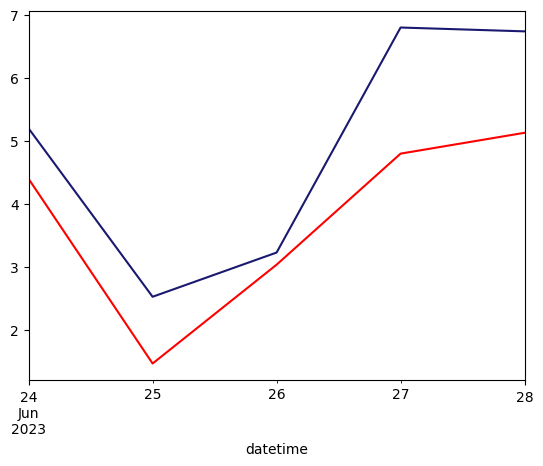

In [ ]:
anastazia_case_df['anger'].resample('D').mean().plot(color='red')
anastazia_case_df['anticipation'].resample('D').mean().plot(color='midnightblue')

**ΔΕΙΚΤΗΣ ΝΤΡΟΠΗΣ ΓΙΑ ΤΗΝ ΥΠΟΘΕΣΗ ΑΝΑΣΤΑΖΙΑ**

<Axes: xlabel='datetime'>

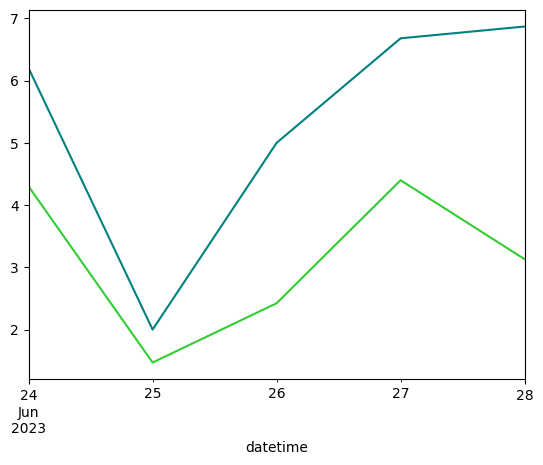

In [ ]:
anastazia_case_df['disgust'].resample('D').mean().plot(color='limegreen')
anastazia_case_df['fear'].resample('D').mean().plot(color='teal')

**ALL TOGETHER**

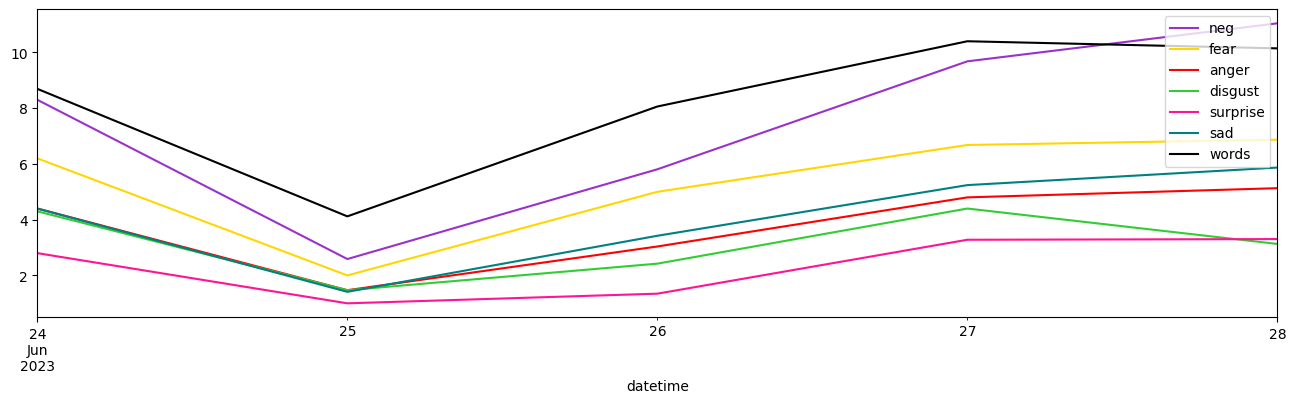

In [ ]:
ax = anastazia_case_df['negative'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'darkorchid', label='neg')
anastazia_case_df['fear'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'fear', color = 'gold')
anastazia_case_df['anger'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anger',color = 'red').legend()
anastazia_case_df['disgust'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'limegreen').legend()
anastazia_case_df['surprise'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'surprise',color = 'deeppink').legend()
anastazia_case_df['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'sad',color = 'teal').legend()
(anastazia_case_df['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax,
                                                label = 'words',color = 'black').legend()